# Entendendo o consumidor

Esse desafio proposto no Bootcamp Tech Minas tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em Probabilidade e Amostragem.

Suponha que você trabalha em uma empresa de produtos de beleza populares e, com a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing, pediu a sua ajuda e gostaria de entender se 1. isso de fato aconteceu e 2. quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus anúncios. Para isso, eles te enviaram a base de dados *(desafio_01_consumidor.csv)*. Como você poderia ajudá-los?

Para responder esse desafio:

A base de dados: desafio_01_consumidor.csv contém informações de seus clientes (anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.

# Bibliotecas

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy.stats import norm

## Análise Exploratória

In [3]:
df = pd.read_csv("Data/desafio01consumidor.csv")
df.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [9]:
df.tail()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0
202,XXXXXXX89,58,14108,desodorante,Sul,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


In [5]:
df.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000


In [6]:
df["produto"].unique()

array(['batom', 'desodorante', 'sombra', 'perfume', 'antissinais', 'base'],
      dtype=object)

In [7]:
df["pre-pandemia"].unique()

array([1, 0], dtype=int64)

In [8]:
df["regiao-BR"].unique()

array(['Sudeste', 'Nordeste', 'Centro-Oeste', 'Sul', 'Norte'],
      dtype=object)

## Processamento dos Dados

In [10]:
df_pre_pandemia = df.loc[(df["pre-pandemia"]==1)]
df_pre_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
96,XXXXXXX80,32,6251,antissinais,Norte,1
97,XXXXXXX92,43,2616,batom,Sul,1
98,XXXXXXX65,54,2324,antissinais,Norte,1
99,XXXXXXX79,61,12278,base,Centro-Oeste,1


In [11]:
df_pos_pandemia = df.loc[(df["pre-pandemia"]==0)]
df_pos_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
101,XXXXXXX67,35,25959,batom,Sul,0
102,XXXXXXX60,35,1995,desodorante,Nordeste,0
103,XXXXXXX48,53,23314,antissinais,Centro-Oeste,0
104,XXXXXXX67,44,16693,antissinais,Centro-Oeste,0
105,XXXXXXX59,37,14631,base,Nordeste,0
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


In [12]:
df_pre_pandemia.drop(["pre-pandemia"],axis = 1,inplace = True)
df_pos_pandemia.drop(["pre-pandemia"],axis = 1,inplace = True)

C:\Users\talit\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df_pre_pandemia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  101 non-null    object
 1   idade       101 non-null    int64 
 2   renda       101 non-null    int64 
 3   produto     101 non-null    object
 4   regiao-BR   101 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.7+ KB


In [16]:
df_pos_pandemia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 101 to 202
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  102 non-null    object
 1   idade       102 non-null    int64 
 2   renda       102 non-null    int64 
 3   produto     102 non-null    object
 4   regiao-BR   102 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.8+ KB


**1. Entenda a distribuição de variáveis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia**

In [151]:
#função para cálculo de média, moda, mediana e desvio padrão 

def metricas(df_coluna,nome):
    media = round(df_coluna.mean(),2)
    mediana = round(statistics.median(df_coluna),2)
    moda = round(statistics.mode(df_coluna),2)
    desvio_padrao = round(df_coluna.std(),2)
    
    info = {"media":media,
            "mediana":mediana,
            "moda":moda,
            "desvio padrão":desvio_padrao}
    infos = pd.DataFrame(info,index=[nome])
    
    return infos

In [115]:
metricas(df_pre_pandemia["idade"],"Idade - pre_pandemia")

,media,mediana,moda,desvio padrão
Idade - pre_pandemia,39.88,37,26,15.02


In [116]:
metricas(df_pos_pandemia["idade"],"Idade - pos_pandemia")

,media,mediana,moda,desvio padrão
Idade - pos_pandemia,44.9,46.0,56,13.37


In [117]:
metricas(df_pre_pandemia["renda"],"Renda - pre_pandemia")

,media,mediana,moda,desvio padrão
Renda - pre_pandemia,9180.64,7488,7452,6007.68


In [118]:
metricas(df_pos_pandemia["renda"],"Renda - pos_pandemia")

,media,mediana,moda,desvio padrão
Renda - pos_pandemia,13968.5,13380.5,25959,5641.38


In [57]:
df_pre_pandemia["produto"].value_counts()

batom          61
desodorante    20
antissinais     9
perfume         4
sombra          4
base            3
Name: produto, dtype: int64

In [58]:
df_pos_pandemia["produto"].value_counts()

desodorante    46
antissinais    20
batom          15
sombra          9
perfume         8
base            4
Name: produto, dtype: int64

Os dados de renda e idade não seguem uma distribuição normal não importando se foi antes ou depois da pandemia, pois em ambos os cenários a média, a mediana e a moda não têm o mesmo valor.

## Visualização dos Dados

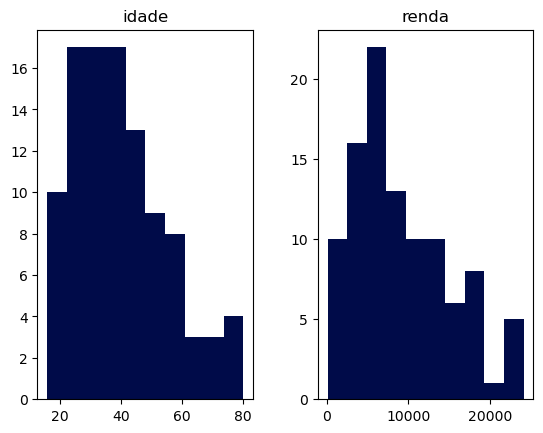

In [96]:
df_pre_pandemia.hist(column=["idade","renda"],grid = False,color="#000B49")
plt.show()

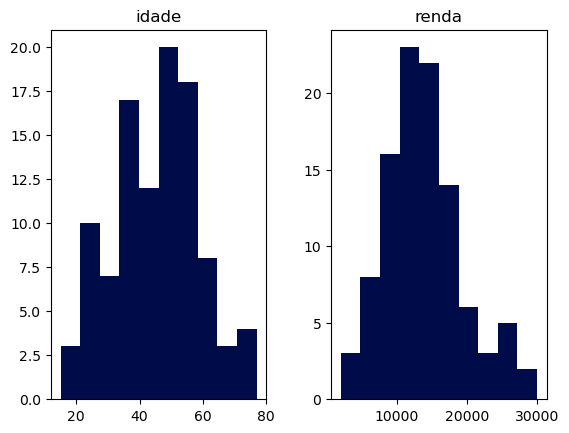

In [95]:
df_pos_pandemia.hist(column=["idade","renda"],grid = False,color="#000B49")
plt.show()

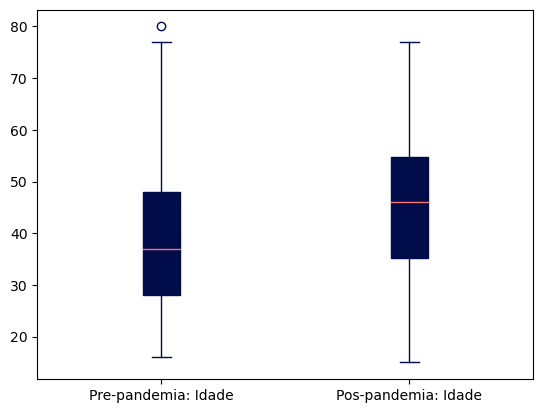

In [92]:
bplot = plt.boxplot(x=[df_pre_pandemia["idade"],df_pos_pandemia["idade"]],
                   patch_artist=True, # ativa preenchimento com cor
                   boxprops=dict(facecolor="#000B49", color="#000B49"),
                    capprops=dict(color="#000B49"),
                    whiskerprops=dict(color="#000B49"),
                    flierprops=dict(markeredgecolor="#000B49"),
                    medianprops=dict(color="#FF7272"))

plt.xticks([1, 2], ["Pre-pandemia: Idade", "Pos-pandemia: Idade"])
plt.show()

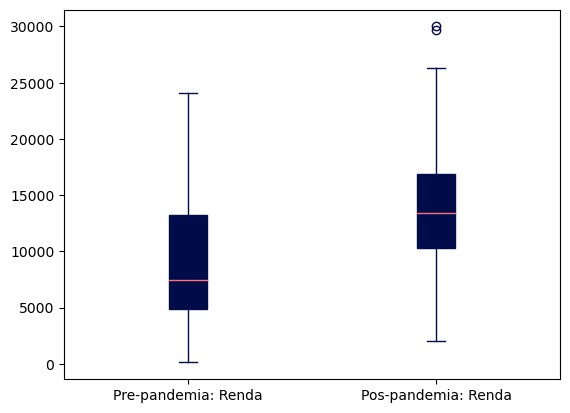

In [94]:
bplot = plt.boxplot(x=[df_pre_pandemia["renda"],df_pos_pandemia["renda"]],
                   patch_artist=True, # ativa preenchimento com cor
                   boxprops=dict(facecolor="#000B49", color="#000B49"),
                    capprops=dict(color="#000B49"),
                    whiskerprops=dict(color="#000B49"),
                    flierprops=dict(markeredgecolor="#000B49"),
                    medianprops=dict(color="#FF7272"))

plt.xticks([1, 2], ["Pre-pandemia: Renda", "Pos-pandemia: Renda"])
plt.show()

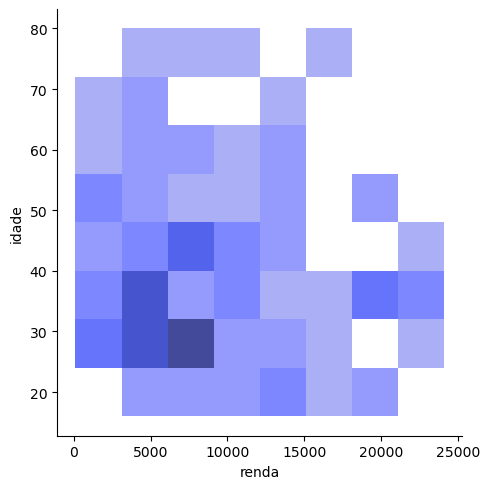

In [102]:
sns.displot(data=df_pre_pandemia, x="renda", y="idade",color="#000B49")
plt.show()

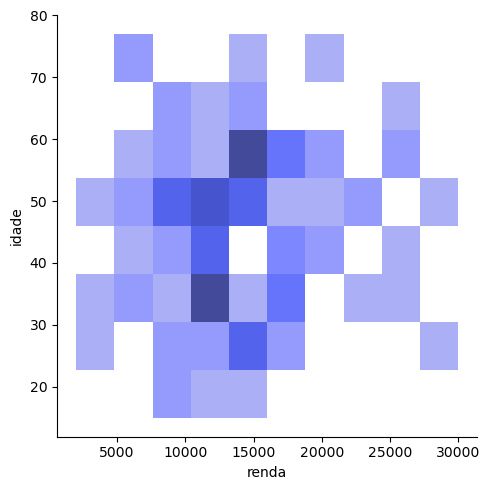

In [103]:
sns.displot(data=df_pos_pandemia, x="renda", y="idade",color="#000B49")
plt.show()

In [152]:
#função retorna posição dos rótulos de dados nos bar chart
def position(x):
    posicao = [i for i in range(0,x,1)] 
    
    return posicao

#função retorna altura nos bar chart 
def height(dataset_name):
    altura = [round(i,2) for i in dataset_name]
    
    return altura

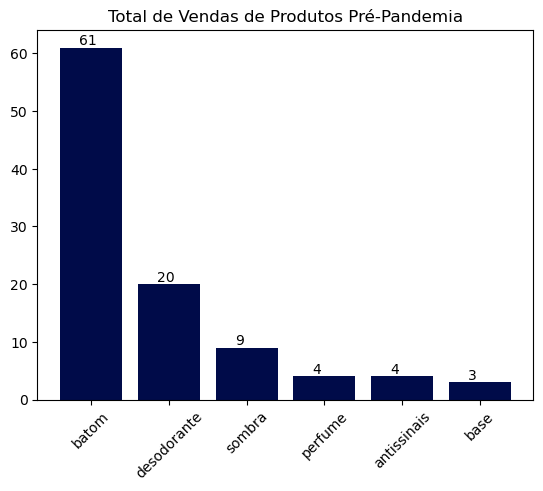

In [174]:
plt.bar(df_pre_pandemia["produto"].unique(),df_pre_pandemia["produto"].value_counts(),color="#000B49")
plt.title("Total de Vendas de Produtos Pré-Pandemia")
plt.xticks(rotation = 45)

#Colocando a quantidade em cada barra -> x=posição, y=altura, s=altura
for i in range(len(df["produto"].unique())):
   plt.text(x = position(6)[i] - 0.15,
                y = height(df_pre_pandemia["produto"].value_counts())[i]+0.5,
                s = str(height(df_pre_pandemia["produto"].value_counts())[i]),
                fontsize=10)

plt.show()

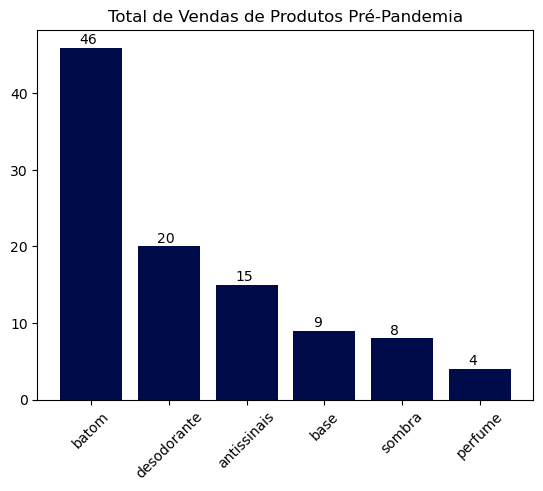

In [175]:
plt.bar(df_pos_pandemia["produto"].unique(),df_pos_pandemia["produto"].value_counts(),color="#000B49")
plt.title("Total de Vendas de Produtos Pré-Pandemia")
plt.xticks(rotation = 45)

#Colocando a quantidade em cada barra -> x=posição, y=altura, s=altura
for i in range(len(df["produto"].unique())):
   plt.text(x = position(6)[i] - 0.15,
                y = height(df_pos_pandemia["produto"].value_counts())[i]+0.5,
                s = str(height(df_pos_pandemia["produto"].value_counts())[i]),
                fontsize=10)

plt.show()

## Desafio 1

 Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [106]:
N = 10000 #tamanho da amostra
e = 0.02

In [105]:
#Obtendo Z
z = norm.ppf((0.5 + (0.95 / 2)))
z

1.959963984540054

# Determinando o Estoque de Segurança

Suponha agora que você trabalha em uma empresa de produtos perecíveis, como Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque seja eficiente. É necessário manter um estoque de segurança em todos os produtos (acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem não ser comprados, e consequentemente, jogados fora, o que na indústria se chama "desova". Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de análise de dados, e ele gostaria de saber qual o estoque de segurança ideal.


In [107]:
df2 = pd.read_csv("Data/desafio_02_estoque.csv")
df2

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5
...,...,...,...
365,2022-01-02,5120,5
366,2022-01-09,4968,3
367,2022-01-16,5095,6
368,2022-01-23,4941,6


## Análise Exploratória dos Dados

In [108]:
df2.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [111]:
df2["data"] = pd.to_datetime(df2["data"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            370 non-null    datetime64[ns]
 1   vendas-iogurte  370 non-null    int64         
 2   lead-time       370 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.8 KB


## Processamento dos Dados

1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

In [135]:
dados_vendas = metricas(df2["vendas-iogurte"],"Vendas - Iogurte")
dados_vendas

,media,mediana,moda,desvio padrão
Vendas - Iogurte,4999.17,4996.0,5020,77.29


In [131]:
dados_lead = metricas(df2["lead-time"],"Lead time")
dados_lead

,media,mediana,moda,desvio padrão
Lead time,5.09,5.0,5,1.58


Os dados de vendas não seguem uma distribuição normal, pois a média, mediana e moda não apresentam o mesmo valor, embora sejam bem próximos. Já o lead-time segue uma distribuição normal.

## Visualização dos Dados

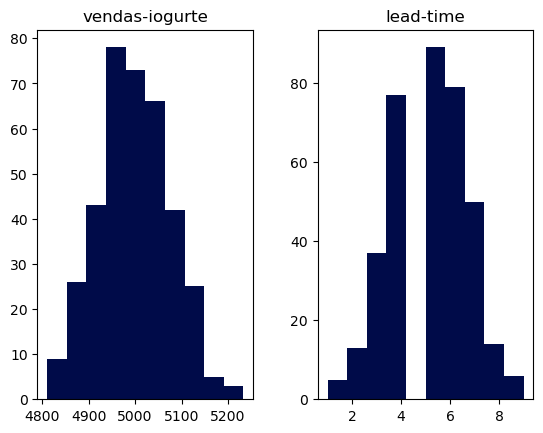

In [121]:
df2.hist(column=["vendas-iogurte","lead-time"],grid = False,color="#000B49")
plt.show()

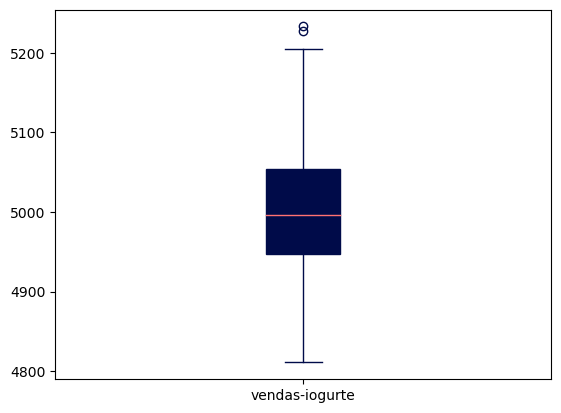

In [124]:
bplot = plt.boxplot(x=[df2["vendas-iogurte"]],
                   patch_artist=True, # ativa preenchimento com cor
                   boxprops=dict(facecolor="#000B49", color="#000B49"),
                    capprops=dict(color="#000B49"),
                    whiskerprops=dict(color="#000B49"),
                    flierprops=dict(markeredgecolor="#000B49"),
                    medianprops=dict(color="#FF7272"))

plt.xticks([1], ["vendas-iogurte"])
plt.show()

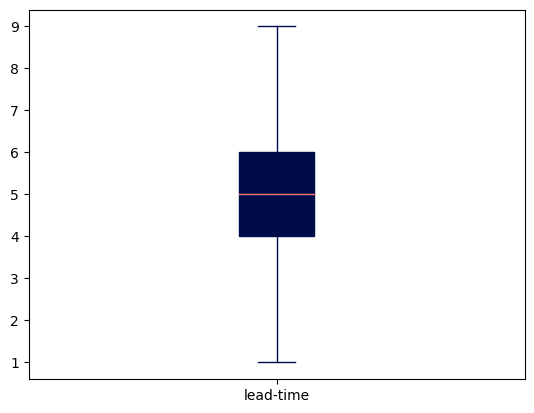

In [123]:
bplot = plt.boxplot(x=[df2["lead-time"]],
                   patch_artist=True, # ativa preenchimento com cor
                   boxprops=dict(facecolor="#000B49", color="#000B49"),
                    capprops=dict(color="#000B49"),
                    whiskerprops=dict(color="#000B49"),
                    flierprops=dict(markeredgecolor="#000B49"),
                    medianprops=dict(color="#FF7272"))

plt.xticks([1], ["lead-time"])
plt.show()

## Desafio 2

Assuma que:

    a. Os dados seguem uma distribuição normal.

    b. O time de vendas utilize para o produto em questão o nível de serviço de 99,87%

    c. O produto não tem sazonalidade (todos os meses vende valores próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.
    
Calcule, com os dados fornecidos, o estoque de segurança desejado.


In [125]:
#Obtendo Z
z = norm.ppf(0.9987)
z

3.011453758499792

In [139]:
media_lead_time = dados_lead["media"][0]
media_lead_time

5.09

In [136]:
desvio_padrao_vendas = dados_vendas["desvio padrão"][0]
desvio_padrao_vendas

77.29

In [142]:
estoque_desejado = z * np.sqrt((desvio_padrao_vendas ** 2) * media_lead_time)
print(f'O estoque de segurança desejado é de {int(estoque_desejado)} produtos ')

O estoque de segurança desejado é de 525 produtos 
